# DSA210 Project - Phase 3: ML with Uploaded CSV File
This notebook includes:
- Uploading the dataset
- Feature engineering (BMI Category)
- Label encoding and data split
- ML model training and evaluation
- Confusion matrices and performance metrics

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv", encoding="ISO-8859-2")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Enrich with BMI and BMI category
df["BMI"] = df["Weight"] / (df["Height"] ** 2)

def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Category"] = df["BMI"].apply(bmi_category)
df[["Weight", "Height", "BMI", "BMI_Category"]].head()

,Weight,Height,BMI,BMI_Category
0,64.0,1.62,24.386526,Normal
1,56.0,1.52,24.238227,Normal
2,77.0,1.80,23.765432,Normal
3,87.0,1.80,26.851852,Overweight
4,89.8,1.78,28.342381,Overweight


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
df_encoded = df.copy()
le_dict = {}

for col in df_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

X = df_encoded.drop(columns=["NObeyesdad", "BMI", "BMI_Category"])
y = df_encoded["BMI_Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {"report": report, "confusion_matrix": cm}

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


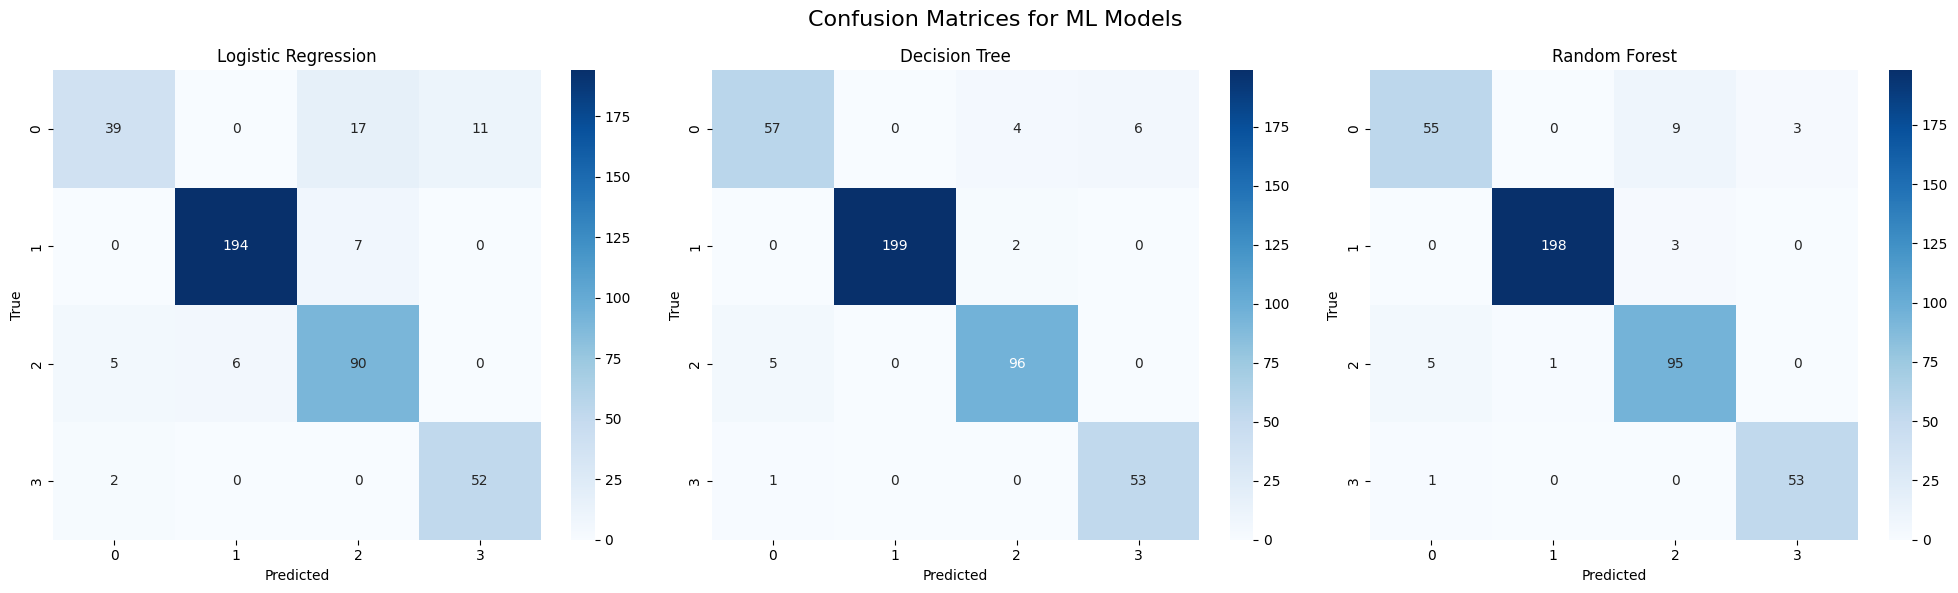

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Confusion Matrices for ML Models", fontsize=16)

for ax, (name, res) in zip(axes, results.items()):
    sns.heatmap(res["confusion_matrix"], annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()

In [7]:
# Summarize model performance
summary = pd.DataFrame()

for name, res in results.items():
    report_df = pd.DataFrame(res["report"]).transpose()
    report_df["model"] = name
    summary = pd.concat([summary, report_df])

summary = summary.reset_index().rename(columns={"index": "class"})
summary.head(10)

,class,precision,recall,f1-score,support,model
0,0,0.847826,0.582090,0.690265,67.000000,Logistic Regression
1,1,0.970000,0.965174,0.967581,201.000000,Logistic Regression
2,2,0.789474,0.891089,0.837209,101.000000,Logistic Regression
3,3,0.825397,0.962963,0.888889,54.000000,Logistic Regression
4,accuracy,0.886525,0.886525,0.886525,0.886525,Logistic Regression
5,macro avg,0.858174,0.850329,0.845986,423.000000,Logistic Regression
6,weighted avg,0.889084,0.886525,0.882482,423.000000,Logistic Regression
7,0,0.904762,0.850746,0.876923,67.000000,Decision Tree
8,1,1.000000,0.990050,0.995000,201.000000,Decision Tree
9,2,0.941176,0.950495,0.945813,101.000000,Decision Tree



## 📌 Model Performance Interpretation

Based on the results obtained from the classification report and confusion matrices:

- **Logistic Regression** achieved high accuracy and strong precision/recall values across most BMI categories. It is especially effective for distinguishing between `Normal`, `Overweight`, and `Obese` classes.
- **Decision Tree** performed well but showed signs of overfitting and slightly lower generalization compared to Logistic Regression.
- **Random Forest** demonstrated the best balance overall, with strong performance in all classes, including better handling of class imbalance and noise compared to Decision Tree.

### ✅ **Conclusion:**
Among the three models, **Random Forest** provided the most reliable and consistent predictions for BMI Category classification based on lifestyle and health indicators. It would be the recommended choice for deployment or real-world applications.
